# Import Data, Fill Missing Values & EDA
- Read in auto-mpg.csv. Check the data types and values of each column. Cast origin as text datatype. Are there any missing or unusual values? Make any fixes necessary.
- Calculate summary statistics for each columns in dataset, including min, max & mean. Then build the histogram of the target variable, mpg.
- Explore the relationships between mpg and features column. Use scatterplots and build a correlation heatmap. Which columns are strongly correlated with mpg?
  

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
mpg = pd.read_csv("D:/MAVEN Analytics/Automative Fuel Economy Python/auto-mpg.csv")
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [6]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [8]:
mpg["origin"] = mpg["origin"].astype("object")
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   car name      398 non-null    object 
dtypes: float64(3), int64(3), object(3)
memory usage: 28.1+ KB


In [10]:
mpg["horsepower"].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [14]:
mpg.query("horsepower == '?'")

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [16]:
mpg["horsepower"] = pd.to_numeric(mpg["horsepower"], errors="coerce")
# errors="coerce" is used because we convert horsepower to numeric data the? 
# values will generate errors and to handle it with pandas NaN value we pass it
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   car name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [18]:
mpg["horsepower"] = mpg["horsepower"].fillna(mpg["horsepower"].mean())
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   car name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [20]:
mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


<Axes: xlabel='mpg', ylabel='Count'>

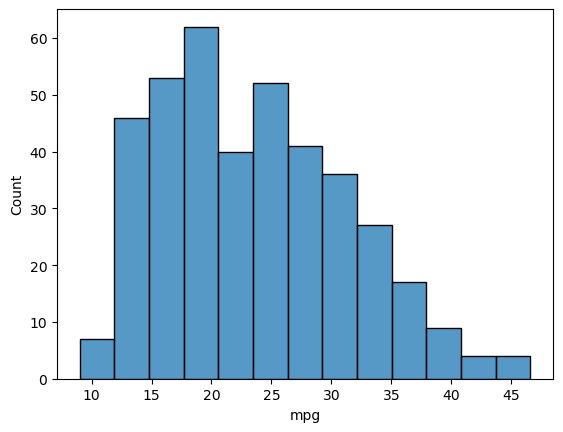

In [22]:
sns.histplot(mpg["mpg"])

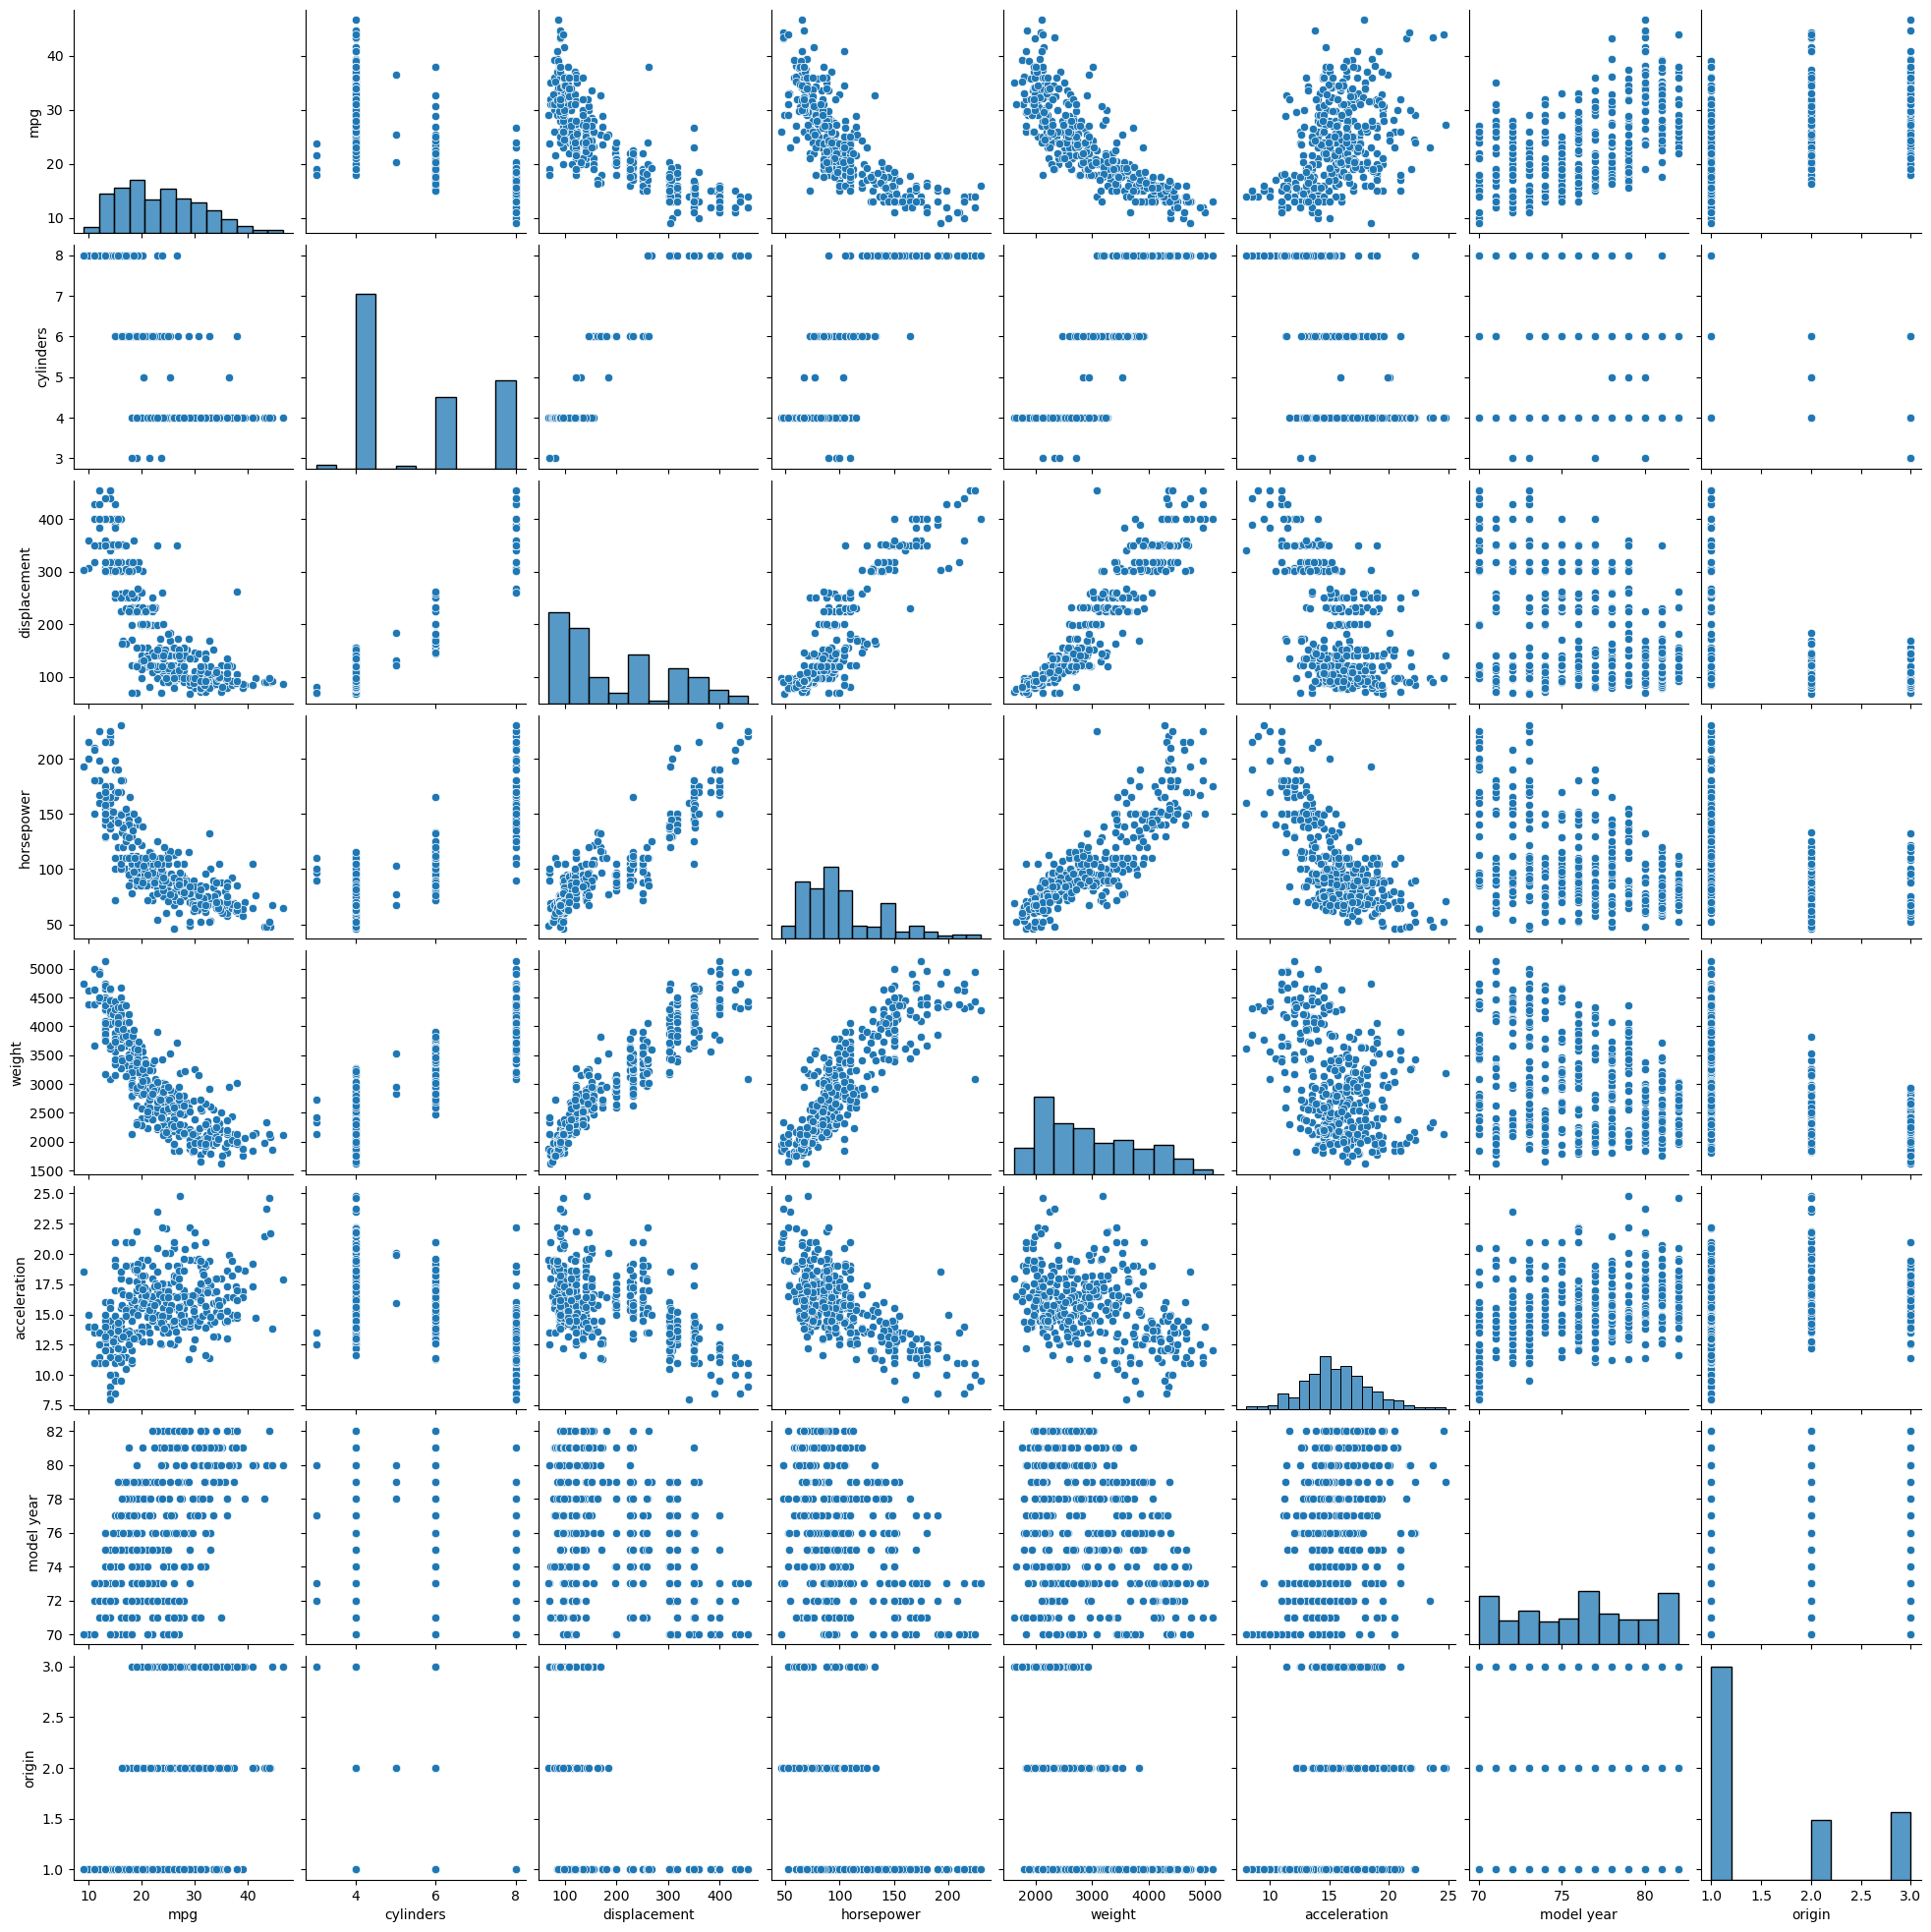

In [27]:
sns.pairplot(mpg)

<Axes: xlabel='origin', ylabel='mpg'>

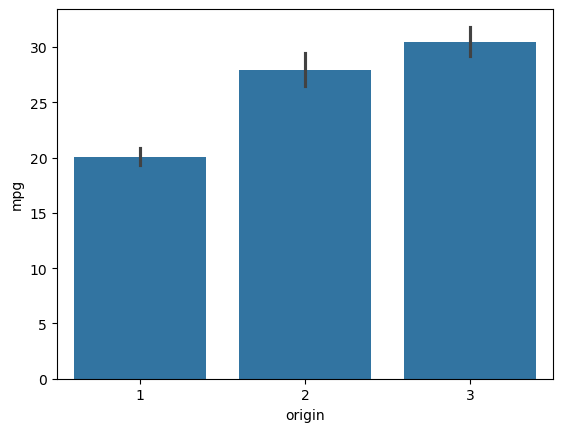

In [29]:
sns.barplot(data=mpg, x="origin", y="mpg")

In [33]:
mpg.corr(numeric_only=True)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
mpg,1.000000,-0.775396,-0.804203,-0.771437,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.838939,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.893646,0.932824,-0.543684,-0.370164
horsepower,-0.771437,0.838939,0.893646,1.000000,0.860574,-0.684259,-0.411651
weight,-0.831741,0.896017,0.932824,0.860574,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.684259,-0.417457,1.000000,0.288137
model year,0.579267,-0.348746,-0.370164,-0.411651,-0.306564,0.288137,1.000000


<Axes: >

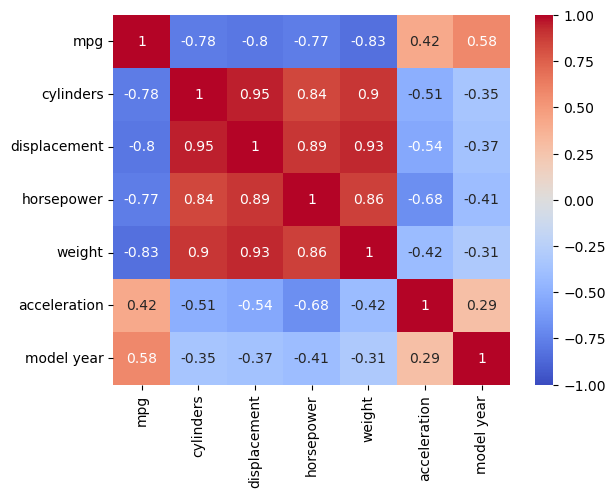

In [35]:
sns.heatmap(
    mpg.corr(numeric_only=True),
    vmin=-1,
    vmax=1,
    cmap="coolwarm",
    annot=True
)

# Split the data & train the model
- Split the data into train and test, then set up the validation scheme of your choice.
- Fit the baseline regression model using the strongest correlation to the target mpg.
- Fit a multiple regression model. Perform any feature selection and feature engineering necessary, fixing any violated assumptions along the way.

In [86]:
mpg_model = mpg.assign(
    weight2 = mpg["weight"] ** 2
).drop("car name", axis=1)

mpg_model = pd.get_dummies(mpg_model, drop_first=True)

In [88]:
mpg_model.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,weight2,origin_2,origin_3
0,18.0,8,307.0,130.0,3504,12.0,70,12278016,False,False
1,15.0,8,350.0,165.0,3693,11.5,70,13638249,False,False
2,18.0,8,318.0,150.0,3436,11.0,70,11806096,False,False
3,16.0,8,304.0,150.0,3433,12.0,70,11785489,False,False
4,17.0,8,302.0,140.0,3449,10.5,70,11895601,False,False


In [90]:
mpg_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   weight2       398 non-null    int64  
 8   origin_2      398 non-null    bool   
 9   origin_3      398 non-null    bool   
dtypes: bool(2), float64(4), int64(4)
memory usage: 25.8 KB


In [92]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score as r2 , mean_absolute_error as mae
import statsmodels.api as sm

In [98]:
features = [
    "weight",
    "weight2",
    "cylinders",
    "displacement",
    "horsepower",
    "acceleration",
    "model year"  
]
X = sm.add_constant(mpg_model[features])
y = mpg_model["mpg"]
X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

In [100]:
kf = KFold(n_splits=5, shuffle=True, random_state=2023)

#Create a list to store the validation score for each fold in X,y
cv_lm_r2s = []
cv_lm_mae = []

#Loop through each element in X,y
for train_ind, val_ind in kf.split(X,y):
    #Subset data based on CV folds
    X_train, y_train = X.iloc[train_ind], y.iloc[train_ind]
    X_val,y_val = X.iloc[val_ind], y.iloc[val_ind]
    #Fit the model on folds training data
    model = sm.OLS(y_train, X_train).fit()
    #Append validation score to the list 
    cv_lm_r2s.append(r2(y_val,model.predict(X_val),))
    cv_lm_mae.append(mae(y_val,model.predict(X_val),))

print("All validations R2s: ", [round(x,3) for x in cv_lm_r2s])
print(f"Cross Val R2s:, {round(np.mean(cv_lm_r2s),3)} +-  {round(np.std(cv_lm_r2s),3)}")

print("All validations MAEs: ", [round(x,3) for x in cv_lm_mae])
print(f"Cross Val MAEs:, {round(np.mean(cv_lm_mae),3)} +-  {round(np.std(cv_lm_mae),3)}")


All validations R2s:  [0.893, 0.861, 0.822, 0.825, 0.83]
Cross Val R2s:, 0.846 +-  0.027
All validations MAEs:  [1.844, 2.192, 2.418, 2.338, 2.459]
Cross Val MAEs:, 2.25 +-  0.223


In [102]:
def resudial_analysis_plots(model):
    import scipy.stats as stats
    import matplotlib.pyplot as plt

    predictions = model.predict()
    residuals = model.resid

    fig, ax = plt.subplots(1,2, sharey="all", figsize=(10,6))

    sns.scatterplot(x=predictions, y=residuals, ax=ax[0])
    ax[0].set_title("Residual Plots")
    ax[0].set_xlabel("Predictions")
    ax[0].set_ylabel("Residuals")

    stats.probplot(residuals, dist="norm", plot=ax[1])
    ax[1].set_title("Normal Q-Q Plot")

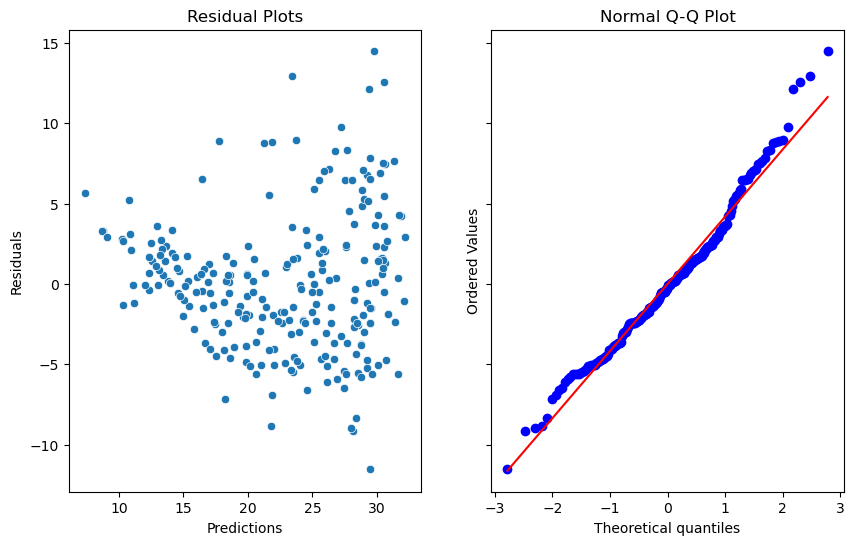

In [66]:
resudial_analysis_plots(model)

In [104]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     216.0
Date:                Tue, 17 Dec 2024   Prob (F-statistic):          1.83e-101
Time:                        11:23:11   Log-Likelihood:                -625.96
No. Observations:                 255   AIC:                             1268.
Df Residuals:                     247   BIC:                             1296.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            5.4643      5.433      1.006      0.316      -5.237      16.165
weight          -0.0214      0.002    -11.525      0.000      -0.025      -0.018
weight2        2.41e-06   2.78e-07      8.665      0.000    1.86e-06    2.96e-06
cylinders       -0.2176      0.335     -0.649      0.517      -0.878       0.443
displacement     0.0047      0.008      0.606      0.545      -0.011       0.020
horsepower      -0.0195      0.014     -1.354      0.177      -0.048       0.009
acceleration    -0.0864      0.106     -0.813      0.417      -0.296       0.123
model year       0.8176      0.055     14.980      0.000       0.710       0.925
==============================================================================
Omnibus:                       32.417   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.311
Skew:                           0.648   Prob(JB):                     3.99e-15
Kurtosis:                       5.136   Cond. No.                     3.46e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.46e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [106]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     269.7
Date:                Tue, 17 Dec 2024   Prob (F-statistic):          9.06e-128
Time:                        11:24:39   Log-Likelihood:                -799.37
No. Observations:                 318   AIC:                             1615.
Df Residuals:                     310   BIC:                             1645.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.3297      5.075      0.853      0.394      -5.656      14.316
weight          -0.0226      0.002    -13.254      0.000      -0.026      -0.019
weight2       2.538e-06    2.6e-07      9.766      0.000    2.03e-06    3.05e-06
cylinders       -0.1156      0.326     -0.355      0.723      -0.757       0.525
displacement     0.0043      0.007      0.575      0.566      -0.010       0.019
horsepower      -0.0130      0.013     -0.965      0.335      -0.039       0.013
acceleration     0.0107      0.098      0.110      0.913      -0.181       0.203
model year       0.8310      0.051     16.240      0.000       0.730       0.932
==============================================================================
Omnibus:                       54.621   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              120.756
Skew:                           0.864   Prob(JB):                     6.00e-27
Kurtosis:                       5.476   Cond. No.                     3.30e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.3e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Score on Test- report R2 & MAE
- Score your final model on test data set- calculate both R2 & MAE. If your test R2 is less than .75, go back to modelling process.
- Interpret your model- what impact does a one-year increase in model year have on the predicted fuel efficiency?

In [109]:
print(f" Test R2: {r2(y_val,model.predict(X_val),)}")
print(f" Test MAE: {mae(y_val,model.predict(X_val),)}")

 Test R2: 0.8399986616973467
 Test MAE: 2.4331831675286746


# Challenge: Ridge Regression
- Repeat the modeling process using Ridge Regression -is model fit better?

In [116]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_m = std.fit_transform(X.values)
X_te = std.transform(X_test.values)

In [122]:
from sklearn.linear_model import RidgeCV

n_alphas =200
alphas = 10 ** np.linspace(-3,3,n_alphas)

ridge_model = RidgeCV(alphas=alphas, cv=5)
ridge_model.fit(X_m,y)

print(ridge_model.score(X_m,y))
print(mae(y,ridge_model.predict(X_m)))
print(ridge_model.alpha_)


0.8589321310143084
2.195938904304859
0.03448962260405758


In [126]:
print(f" Test R2: {r2(y_test,ridge_model.predict(X_te))}")
print(f" Test MAE: {mae(y_test,ridge_model.predict(X_te))}")

 Test R2: 0.8221047129353088
 Test MAE: 2.2744645009520315
